# Modelo propuesto

## Librerías

In [1]:
import pandas as pd
from pycaret.classification import *

## Exploración con PyCaret

### Carga de datos preprocesados

Se realiza la carga del archivo `.csv` que contiene el data set resultado del preprocesamiento.  

In [2]:
path = "lung_cancer_data_preprocessed.csv" # Ruta del dataset 

archivo = pd.read_csv(path) # Importación de datos de la ruta
df = pd.DataFrame(archivo) # Convertir los datos a un pandas DataFrame

df.head()

,GENDER_1,GENDER_2,AGE,SMOKING_1,SMOKING_2,YELLOW_FINGERS_1,YELLOW_FINGERS_2,ANXIETY_1,ANXIETY_2,PEER_PRESSURE_1,...,ALCOHOL CONSUMING_2,COUGHING_1,COUGHING_2,SHORTNESS OF BREATH_1,SHORTNESS OF BREATH_2,SWALLOWING DIFFICULTY_1,SWALLOWING DIFFICULTY_2,CHEST PAIN_1,CHEST PAIN_2,LUNG_CANCER
0,1.0,0.0,69,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2
1,1.0,0.0,74,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2
2,0.0,1.0,59,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,0.0,63,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
4,0.0,1.0,63,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


Por medio de la librería `PyCaret` se realiza una exploración de modelos de clasificación a implementar. En primer lugar, se inicializa el entorno y configuran los parámetros de clasificación de acuerdo al dataset cargado e indicando la variable objetivo del modelo supervisado.   

In [3]:
clf = setup(df, target='LUNG_CANCER')

,Description,Value
0,Session id,5086
1,Target,LUNG_CANCER
2,Target type,Binary
3,Target mapping,"1: 0, 2: 1"
4,Original data shape,"(540, 30)"
5,Transformed data shape,"(540, 30)"
6,Transformed train set shape,"(378, 30)"
7,Transformed test set shape,"(162, 30)"
8,Numeric features,29
9,Preprocess,True


El entorno realiza un mapeo de las variables y las convierte a binarias, no realiza transformaciones de los datos y determina un conjunto de entrenamiento y de pruebas a partir de los datos. 

A continuación se realiza la comparación de rendimiento y métricas de distintos modelos de clasificación:  

In [4]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:36:16
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9709,0.9914,0.9709,0.9728,0.9709,0.9418,0.9437,0.0930
rf,Random Forest Classifier,0.9602,0.9954,0.9602,0.9624,0.9602,0.9204,0.9226,0.1050
dt,Decision Tree Classifier,0.9577,0.9573,0.9577,0.9633,0.9572,0.9153,0.9208,0.0160
gbc,Gradient Boosting Classifier,0.9576,0.9783,0.9576,0.9601,0.9575,0.9152,0.9177,0.0600
lightgbm,Light Gradient Boosting Machine,0.9575,0.9780,0.9575,0.9601,0.9575,0.9151,0.9176,0.0850
ada,Ada Boost Classifier,0.9311,0.9711,0.9311,0.9338,0.9309,0.8621,0.8649,0.0570
lr,Logistic Regression,0.9151,0.9672,0.9151,0.9205,0.9148,0.8301,0.8355,0.8890
ridge,Ridge Classifier,0.8809,0.0000,0.8809,0.8883,0.8802,0.7615,0.7689,0.0210
lda,Linear Discriminant Analysis,0.8809,0.9613,0.8809,0.8883,0.8802,0.7615,0.7689,0.0170
nb,Naive Bayes,0.8782,0.9410,0.8782,0.8845,0.8774,0.7562,0.7624,0.0190


In [5]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

De acuerdo a los resultados, los modelos con mejores métricas para el conjunto de datos son Random Forest Classifier y Extra Trees Classifier. En el siguiente apartado se evaluarán los modelos por separado para seleccionar uno de los dos. 

# Evaluación del modelo

A continuación, se evaluarán los datos con los modelos de Random Forests Classifier y Extra Trees Classifier.

## Librerías



In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

Cargue de los datos preprocesados: 

In [14]:
path = "lung_cancer_data_preprocessed.csv" # Ruta del dataset 

archivo = pd.read_csv(path) # Importación de datos de la ruta
df = pd.DataFrame(archivo) # Convertir los datos a un pandas DataFrame

df.head()

,GENDER_1,GENDER_2,AGE,SMOKING_1,SMOKING_2,YELLOW_FINGERS_1,YELLOW_FINGERS_2,ANXIETY_1,ANXIETY_2,PEER_PRESSURE_1,...,ALCOHOL CONSUMING_2,COUGHING_1,COUGHING_2,SHORTNESS OF BREATH_1,SHORTNESS OF BREATH_2,SWALLOWING DIFFICULTY_1,SWALLOWING DIFFICULTY_2,CHEST PAIN_1,CHEST PAIN_2,LUNG_CANCER
0,1.0,0.0,69,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2
1,1.0,0.0,74,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2
2,0.0,1.0,59,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
3,1.0,0.0,63,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
4,0.0,1.0,63,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1


Definición de conjuntos de entrenamiento y de pruebas con proporciones del 0.8 y 0.2 respectivamente: 

In [23]:
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Tamaño del dataset completo: {df.shape}")

Tamaño del conjunto de entrenamiento: X_train: (432, 29), y_train: (432,)
Tamaño del conjunto de prueba: X_test: (108, 29), y_test: (108,)
Tamaño del dataset completo: (540, 30)


## Random Forest Classifier

A continuación, se realiza una búsqueda de los mejores hiperparámetros para el modelo usando `GridSearchCV`, definiendo un rango considerable de estimadores, el número máximo de variables consideradas para dividir un nodo, se estima una profundidad de cada árbol entre 4 y 8 y dos medidas de calidad. 

In [26]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best cross-validation accuracy: {(grid.best_score_):.2f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Test set accuracy: {(grid.score(X_test, y_test)):.2f}")

Best cross-validation accuracy: 0.97
Best parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
Test set accuracy: 0.97


Utilizamos los mejores parámetros seleccionados en el paso anterior para evaluar nuestro modelo: 

In [27]:
forest = RandomForestClassifier(criterion="gini", max_depth=8, n_estimators=100)
forest.fit(X_train, y_train)
print(f"Accuracy on training set: {forest.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {forest.score(X_test, y_test):.3f}")

Accuracy on training set: 0.991
Accuracy on test set: 0.981


La precisión es alta tanto para el conjunto de entrenamiento como para el conjunto de prueba, indicando un modelo muy eficiente. 

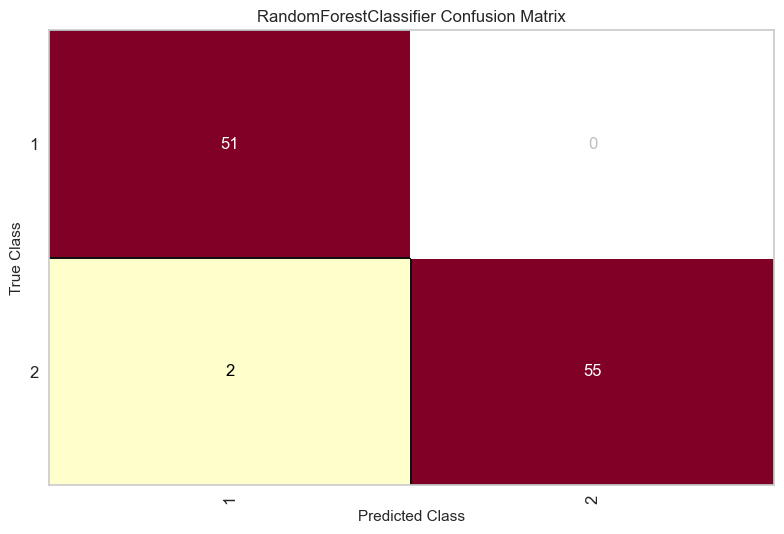

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [35]:
cm = ConfusionMatrix(forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

La matriz de confusión presenta un grado alto de clasificación, mostrando solo dos casos de falsos positivos y ninguno de falso negativo. 

In [36]:
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        51
           2       1.00      0.96      0.98        57

    accuracy                           0.98       108
   macro avg       0.98      0.98      0.98       108
weighted avg       0.98      0.98      0.98       108



Las métricas del modelo entrenado nos presenta una precisión general del 98%, lo que es aún superior a los resultados obtenidos con PyCaret en el mismo modelo. La precisión es perfecta en el caso de los pacientes con cáncer de pulmón, y el recall nos indica una inclinación favorable hacia los pacientes sin dicho diagnóstico. 

## Extra Trees Classifier

De manera similar con el modelo anterior, buscamos los hiperparámetros adecuados para el entrenamiento y evaluación. Se determinó un rango de estimadores entre 100 y 300, se usaron los mismos métodos para el número máximo de variables, y se determinaron el número mínimo de muestras requeridas para dividir un nodo interno con 2, 5 y 10 muestras. 

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],  
    'min_samples_split': [2, 5, 10],
}

grid = GridSearchCV(ExtraTreesClassifier(), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best cross-validation accuracy: {(grid.best_score_):.2f}")
print(f"Best parameters: {grid.best_params_}")
print(f"Test set accuracy: {(grid.score(X_test, y_test)):.2f}")

Best cross-validation accuracy: 0.97
Best parameters: {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Test set accuracy: 0.99


De acuerdo con los parámetros definidos establecemos el modelo para su evaluación. 

In [38]:
extra = ExtraTreesClassifier(max_features='sqrt', min_samples_split= 2, n_estimators= 200)
extra.fit(X_train, y_train)
print(f"Accuracy on training set: {extra.score(X_train, y_train):.3f}")
print(f"Accuracy on test set: {extra.score(X_test, y_test):.3f}")

Accuracy on training set: 0.998
Accuracy on test set: 0.991


Generamos la matriz de confusión para ver la capacidad de clasificación del modelo. 

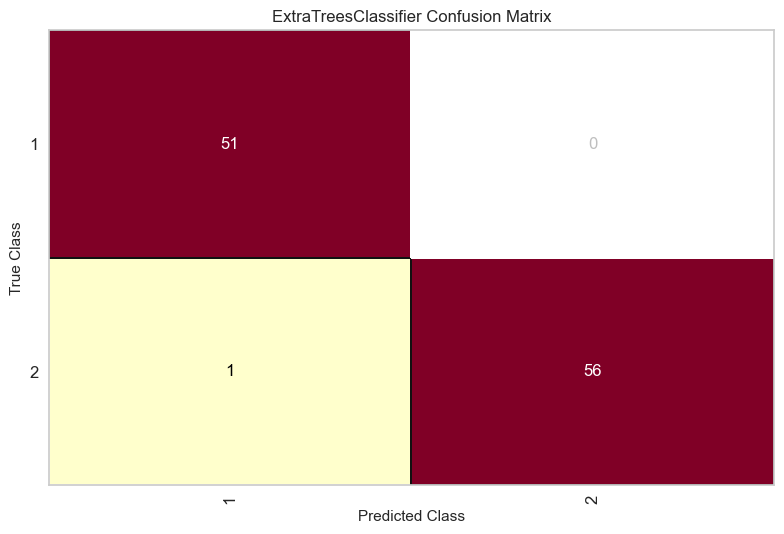

<Axes: title={'center': 'ExtraTreesClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [39]:
cm = ConfusionMatrix(extra)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

La matriz de confusión demuestra un nivel casi perfecto de clasificación del modelo, con solo un falso positivo en los resultados.  

In [40]:
y_pred = extra.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        51
           2       1.00      0.98      0.99        57

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108



Las métricas del modelo reflejan una precisión muy alta, logrando un 99%, lo que se traduce en un entrenamiento y clasificación muy eficiente, por encima de la mayoría de modelos. 

## Conclusión

Para la solución propuesta se selecciona el modelo de entrenamiento Extra Tree Classifier, le cual logra tener resultados superiores en comparación al Random Forest Classifier. A pesar del buen desempeño de éste último y una poca diferencia entre los dos modelos, Extra Tree Classifier logró una matriz de confusión más consolidada en el conjunto de pruebas, así como métricas de precisión más acertadas. 